# Introduction: IPython Widgets

In this notebook, we will get an introduction to IPython widgets. These are tools that allow us to build interactivity into our notebooks often with a single line of code. These widgets are very useful for data exploration and analysis, for example, selecting certain data or updating charts. In effect, Widgets allow you to make Jupyter Notebooks into an interactive dashboard instead of a static document.

Run the below cell if needed. You can also do this from the command line. If in Jupyter lab, [check out the instructions for that environment](https://ipywidgets.readthedocs.io/en/stable/user_install.html). 

In [1]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


These are the other imports will use. 

In [7]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import chart_studio.plotly as py

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
import os
from IPython.display import Image, display, HTML

## Data

For this project, we'll work with my medium stats data. You can grab your own data or just use mine! 

In [14]:
df = pd.read_parquet('https://github.com/WillKoehrsen/Data-Analysis/blob/master/medium/data/medium_data_2019_01_26?raw=true')
df.head()

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
129,2,597.301123,2,https://medium.com/p/screw-the-environment-but...,0,None,2017-06-10 14:25:00+00:00,42.17,7,70,2017-06-10 14:24:00+00:00,"[Climate Change, Economics]","Screw the Environment, but Consider Your Walle...","Screw the Environment, but Consider Your Wallet",8,published,166,1859,0.001076,0,0,0,0,0,0
125,18,589.983168,3,https://medium.com/p/the-vanquishing-of-war-pl...,0,None,2017-06-17 22:02:00+00:00,30.34,14,54,2017-06-17 22:02:00+00:00,"[Climate Change, Humanity, Optimism, History]","The Vanquishing of War, Plague and Famine Part...","The Vanquishing of War, Plague and Famine",8,published,178,3891,0.004626,0,0,0,0,0,0
132,51,577.363292,20,https://medium.com/p/capstone-project-mercedes...,0,None,2017-06-30 12:55:00+00:00,20.02,42,222,2017-06-30 12:00:00+00:00,"[Machine Learning, Python, Udacity, Kaggle]",Capstone Project: Mercedes-Benz Greener Manufa...,Capstone Project: Mercedes-Benz Greener Manufa...,7,published,1109,12025,0.004241,0,0,0,0,1,1
126,0,576.520688,0,https://medium.com/p/home-of-the-scared-5af0fe...,0,None,2017-07-01 09:08:00+00:00,35.85,9,19,2017-06-30 18:21:00+00:00,"[Politics, Books, News, Media Criticism]",Home of the Scared A review of A Culture of Fe...,Home of the Scared,4,published,53,2533,0.000000,0,0,0,0,0,0
121,0,572.533035,0,https://medium.com/p/the-triumph-of-peace-f485...,0,None,2017-07-05 08:51:00+00:00,8.47,14,5,2017-07-03 20:18:00+00:00,"[Books, Psychology, History, Humanism]",The Triumph of Peace A review of The Better An...,The Triumph of Peace,4,published,59,3892,0.000000,1,0,0,0,0,0


In [15]:
df.describe()

,claps,days_since_publication,fans,num_responses,read_ratio,read_time,reads,title_word_count,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1815.263158,248.407273,352.052632,7.045113,29.074662,12.917293,6336.300752,7.127820,23404.030075,3029.120301,0.957638,20.330827,0.729323,0.609023,0.436090,0.383459,0.315789
std,2449.074661,179.370879,479.060117,9.056108,12.417670,9.510795,9007.284726,3.158475,33995.636496,2393.414456,1.846756,74.111579,0.445989,0.489814,0.497774,0.488067,0.466587
min,0.000000,1.218629,0.000000,0.000000,8.110000,1.000000,1.000000,2.000000,3.000000,163.000000,0.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,74.543822,23.000000,0.000000,20.020000,8.000000,363.000000,5.000000,1375.000000,1653.000000,0.052115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,815.000000,245.416130,136.000000,4.000000,27.060000,10.000000,2049.000000,7.000000,7608.000000,2456.000000,0.421525,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2700.000000,376.080598,528.000000,12.000000,34.910000,14.000000,7815.000000,8.000000,30141.000000,3553.000000,1.099366,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,13600.000000,597.301123,2588.000000,59.000000,74.370000,54.000000,41978.000000,16.000000,173714.000000,15063.000000,17.891817,349.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Simple Widgets

Let's get started using some widgets! We'll start off pretty simple just to see how the interface works.

In [16]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

To make a function interactive, all we have to do is use the `interact` decorator. This will automatically infer the input types for us! 

In [17]:
@interact
def show_articles_more_than(column='claps', x=5000):
    display(HTML(f'<h2>Showing articles with more than {x} {column}<h2>'))
    display(df.loc[df[column] > x, ['title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

,title,published_date,read_time,tags,views,reads
100,Stock Prediction in Python,2018-01-19 15:30:00+00:00,12,"[Machine Learning, Data Science, Programming, ...",134699,41978
88,Python is the Perfect Tool for any Problem,2018-02-04 09:12:00+00:00,3,"[Python, Programming, Education, Data Science,...",48157,30099
89,Markov Chain Monte Carlo in Python,2018-02-09 22:29:00+00:00,12,"[Machine Learning, Data Science, Programming, ...",57830,16735
83,Bayes’ Rule Applied,2018-02-14 11:27:00+00:00,9,"[Statistics, Programming, Education, Data Anal...",35505,11491
82,Beyond Accuracy: Precision and Recall,2018-03-03 11:10:00+00:00,11,"[Machine Learning, Data Science, Education, St...",128661,26327
84,Controlling the Web with Python,2018-03-10 16:16:00+00:00,9,"[Python, Education, Programming, Internet, Tow...",65054,14614
75,Introduction to Bayesian Linear Regression,2018-04-13 20:38:00+00:00,10,"[Data Science, Education, Statistics, Learning...",58471,19805
65,"Web Scraping, Regular Expressions, and Data Vi...",2018-04-28 15:27:00+00:00,7,"[Data Science, Programming, Education, Compute...",68317,21607
69,A Complete Machine Learning Project Walk-Throu...,2018-05-16 12:33:00+00:00,15,"[Machine Learning, Education, Data Science, Py...",124970,23587
62,Machine Learning Kaggle Competition Part One: ...,2018-05-28 11:39:00+00:00,12,"[Data Science, Machine Learning, Towards Data ...",43577,10398


interactive(children=(Text(value='claps', description='column'), IntSlider(value=5000, description='x', max=15…

The `interact` decorator automatically inferred we want a `text` box for the `column` and an `int` slider for `x`! This makes it incredibly simple to add interactivity. We can also set the options how we want.

In [18]:
@interact
def show_titles_more_than(x=(1000, 5000, 100),
                          column=list(df.select_dtypes('number').columns), 
                          ):
    # display(HTML(f'<h2>Showing articles with more than {x} {column}<h2>'))
    display(df.loc[df[column] > x, ['title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

,title,published_date,read_time,tags,views,reads
110,Random Forest in Python,2017-12-27 11:20:00+00:00,21,"[Machine Learning, Data Science, Random Forest...",173714,30709
104,Time Series Analysis in Python: An Introduction,2018-01-12 20:48:00+00:00,14,"[Data Science, Data, Programming, Python, Towa...",130417,32752
100,Stock Prediction in Python,2018-01-19 15:30:00+00:00,12,"[Machine Learning, Data Science, Programming, ...",134699,41978
98,How to Master New Skills,2018-01-31 11:41:00+00:00,6,"[Data Science, Education, Programming, Space, ...",15370,7282
93,Statistical Significance Explained,2018-02-02 09:26:00+00:00,10,"[Data Science, Hypothesis Testing, P Value, St...",50691,15106
88,Python is the Perfect Tool for any Problem,2018-02-04 09:12:00+00:00,3,"[Python, Programming, Education, Data Science,...",48157,30099
89,Markov Chain Monte Carlo in Python,2018-02-09 22:29:00+00:00,12,"[Machine Learning, Data Science, Programming, ...",57830,16735
83,Bayes’ Rule Applied,2018-02-14 11:27:00+00:00,9,"[Statistics, Programming, Education, Data Anal...",35505,11491
82,Beyond Accuracy: Precision and Recall,2018-03-03 11:10:00+00:00,11,"[Machine Learning, Data Science, Education, St...",128661,26327
84,Controlling the Web with Python,2018-03-10 16:16:00+00:00,9,"[Python, Education, Programming, Internet, Tow...",65054,14614


interactive(children=(IntSlider(value=3000, description='x', max=5000, min=1000, step=100), Dropdown(descripti…

This now gives us a `dropdown` for the `column` selection and still an `int` slider for `x`, but with limits. This can be useful when we need to enforce certains constraints on the interaction.

# Image Explorer

Let's see another quick example of creating an interactive function. This one allows us to display images from a folder.

In [19]:
fdir = 'nature/'

@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file))

FileNotFoundError: [Errno 2] No such file or directory: 'nature/'

You could use this for example if you have a training set of images that you'd quickly like to run through.

# File Browser

We can do a similar operation to create a very basic file browser. Instead of having to manually run the command every time, we just can use this function to look through our files.

In [10]:
!ls -a -t -r -l

total 23368
drwxr-xr-x  26 williamkoehrsen  staff      832 Jan 26 10:09 nature
drwxr-xr-x  42 williamkoehrsen  staff     1344 Jan 26 10:35 images
drwxr-xr-x  18 williamkoehrsen  staff      576 Jan 27 09:55 assorted
-rw-r--r--   1 williamkoehrsen  staff  5978832 Jan 27 17:02 Widgets Overview-Extended Work.ipynb
drwxr-xr-x   4 williamkoehrsen  staff      128 Jan 27 17:30 .ipynb_checkpoints
-rw-r--r--@  1 williamkoehrsen  staff     8196 Jan 28 09:03 .DS_Store
drwxr-xr-x  38 williamkoehrsen  staff     1216 Feb 11 09:20 ..
-rw-r--r--   1 williamkoehrsen  staff  5968304 Feb 11 16:59 Widgets-Overview.ipynb
drwxr-xr-x   9 williamkoehrsen  staff      288 Feb 11 16:59 .


In [11]:
import subprocess
import pprint

root_dir = '../'
dirs = [d for d in os.listdir(root_dir) if not '.' in d]

@interact
def show_dir(dir=dirs):
    x = subprocess.check_output(f"cd {root_dir}{dir} && ls -a -t -r -l -h", shell=True).decode()
    print(x)

interactive(children=(Dropdown(description='dir', options=('additive_models', 'statistics', 'recall_precision'…

# Dataframe Explorer

Let's look at a few more examples of using widgets to explore data. Here we create a widget that quickly lets us find correlations between columns.

In [20]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

Correlation: 1.0


interactive(children=(Dropdown(description='column1', options=('claps', 'days_since_publication', 'fans', 'num…

Here's one to describe a specific column.

In [21]:
@interact
def describe(column=list(df.columns)):
    print(df[column].describe())

count      133.000000
mean      1815.263158
std       2449.074661
min          0.000000
25%        121.000000
50%        815.000000
75%       2700.000000
max      13600.000000
Name: claps, dtype: float64


interactive(children=(Dropdown(description='column', options=('claps', 'days_since_publication', 'fans', 'link…

# Interactive Widgets for Plots

We can use the same basic approach to create interactive widgets for plots. This expands the capabilities of the already powerful plotly visualization library.

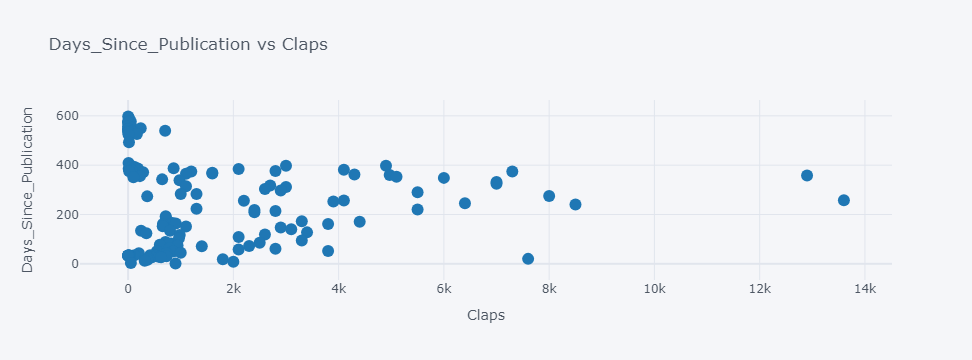

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

In [22]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

Let's add some options to control the column scheme.

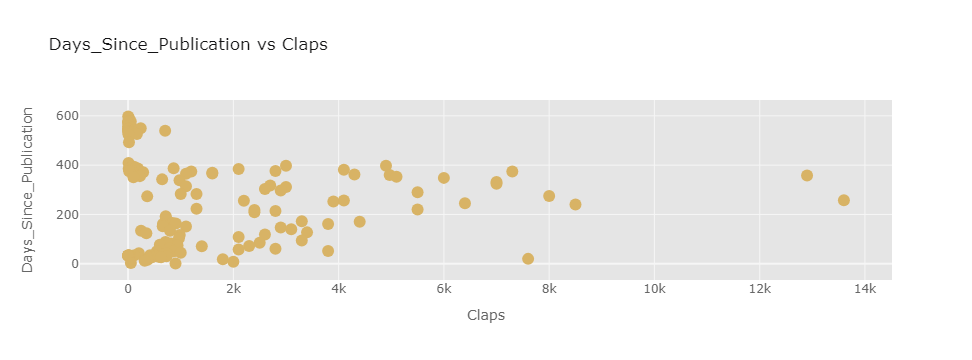

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

In [23]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

The next plot lets us choose the grouping category for the plot. 

/home/jpic/.local/lib/python3.10/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/home/jpic/.local/lib/python3.10/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



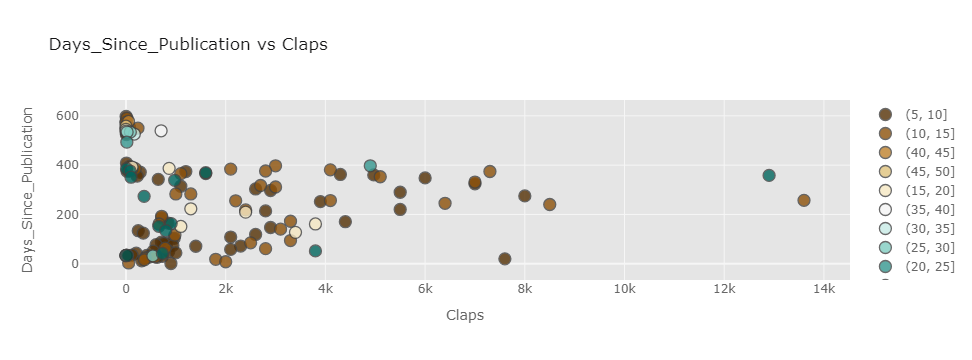

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

In [24]:
df['binned_read_time'] = pd.cut(df['read_time'], bins=range(0, 56, 5))
df['binned_read_time'] = df['binned_read_time'].astype(str)

df['binned_word_count'] = pd.cut(df['word_count'], bins=range(0, 100001, 1000))
df['binned_word_count'] = df['binned_word_count'].astype(str)

@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 categories=['binned_read_time', 'binned_word_count', 'publication', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

You may have noticed this plot was a little slow to update. When that is the case, we can use `interact_manual` which only updates the function when the button is pressed.

In [17]:
from ipywidgets import interact_manual

In [18]:
@interact_manual
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 categories=['binned_read_time', 'binned_word_count', 'publication', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

# Making Our Own Widgets

The decorator `interact` (or `interact_manual`) is not the only way to use widgets. We can also explicity create our own. One of the most useful I've found is the `DataPicker`.

In [19]:
df.set_index('published_date', inplace=True)

In [20]:
def print_articles_published(start_date, end_date):
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    stat_df = df.loc[(df.index >= start_date) & (df.index <= end_date)].copy()
    total_words = stat_df['word_count'].sum()
    total_read_time = stat_df['read_time'].sum()
    num_articles = len(stat_df)
    print(f'You published {num_articles} articles between {start_date.date()} and {end_date.date()}.')
    print(f'These articles totalled {total_words:,} words and {total_read_time/60:.2f} hours to read.')
    
_ = interact(print_articles_published,
             start_date=widgets.DatePicker(value=pd.to_datetime('2018-01-01')),
             end_date=widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

interactive(children=(DatePicker(value=Timestamp('2018-01-01 00:00:00'), description='start_date'), DatePicker…

For this function, we use a `Dropdown` and a `DatePicker` to plot one column cumulatively up to a certain time. Instead of having to write this ourselves, we can just let `ipywidgets` do all the work!

In [21]:
def plot_up_to(column, date):
    date = pd.Timestamp(date)
    plot_df = df.loc[df.index <= date].copy()
    plot_df[column].cumsum().iplot(mode='markers+lines', 
                                   xTitle='published date',
                                   yTitle=column, 
                                  title=f'Cumulative {column.title()} Until {date.date()}')
    
_ = interact(plot_up_to, column=widgets.Dropdown(options=list(df.select_dtypes('number').columns)), 
             date = widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

interactive(children=(Dropdown(description='column', options=('claps', 'days_since_publication', 'fans', 'num_…

# Dependent Widgets

How do we get a value of a widget to depend on that of another? Using the `observe` method.

Going back to the Image Browser earlier, let's make a function that allows us to change the directory for the images to list.

In [22]:
directory = widgets.Dropdown(options=['images', 'nature', 'assorted'])
images = widgets.Dropdown(options=os.listdir(directory.value))

def update_images(*args):
    images.options = os.listdir(directory.value)

directory.observe(update_images, 'value')

def show_images(fdir, file):
    display(Image(f'{fdir}/{file}'))

_ = interact(show_images, fdir=directory, file=images)

interactive(children=(Dropdown(description='fdir', options=('images', 'nature', 'assorted'), value='images'), …

We can also assign to the `interact` call and then reuse the widget. This has unintended affects though! 

In [23]:
def show_stats_by_tag(tag):
    display(df.groupby(f'<tag>{tag}').describe()[['views', 'reads', 'claps', 'read_ratio']])
    
stats = interact(show_stats_by_tag,
                tag=widgets.Dropdown(options=['Towards Data Science', 'Education', 'Machine Learning', 'Python', 'Data Science']))

interactive(children=(Dropdown(description='tag', options=('Towards Data Science', 'Education', 'Machine Learn…

In [24]:
stats.widget

interactive(children=(Dropdown(description='tag', options=('Towards Data Science', 'Education', 'Machine Learn…

Now changing the value in one location changes it in both places! This can be a slight inconvenience, but on the plus side, now we can reuse the interactive element.

# Linked Values

We can link the value of two widgets to each other using the `jslink` function. This ties the values to be the same.

In [25]:
def show_less_than(column1_value, column2_value):
    display(df.loc[(df['views'] < column1_value) & 
                    (df['reads'] < column2_value), 
                   ['title', 'read_time', 'tags', 'views', 'reads']])
        
column1_value=widgets.IntText(value=100, label='First')
column2_value=widgets.IntSlider(value=100, label='Second')

linked = widgets.jslink((column1_value, 'value'),
                        (column2_value, 'value'))

less_than = interact(show_less_than, column1_value=column1_value,
                 column2_value=column2_value)

interactive(children=(IntText(value=100, description='column1_value'), IntSlider(value=100, description='colum…

I'm not exactly sure why you would want to link two widgets, but there you go! We can unlink them using the `unlink` command (sometimes syntax does make sense).

In [26]:
linked.unlink()

In [27]:
less_than.widget

interactive(children=(IntText(value=100, description='column1_value'), IntSlider(value=100, description='colum…

# Conclusions

These widgets are not going to change your life, but they do make notebooks closer to interactive dashboards. I've only shown you some of the capabilities so be sure to look at the [documentation for the full details]. The Jupyter Notebook is useful by itself, but with additional tools, it can be an even better data exploration and analysis technology. Thanks to the efforts of many developers and contributors to open-source, we have these great technologies, so we might as well get the most from these libraries! 

In [28]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [29]:
import plotly.figure_factory as ff

corrs = df.corr()

@interact_manual
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)

interactive(children=(Dropdown(description='colorscale', options=('Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Blue…

In [30]:
@interact
def plot_spread(column1=['claps', 'views', 'read', 'word_count'], 
                 column2=['views', 'claps', 'read', 'word_count']):
    df.iplot(kind='ratio',
                                                   y=column1,
                                                   secondary_y=column2,
                                                   title=f'{column1.title()} and {column2.title()} Spread Plot',
                                 xTitle='Published Date')

interactive(children=(Dropdown(description='column1', options=('claps', 'views', 'read', 'word_count'), value=…